examples from Thad's book, and maybe more.

some key differences in python to look out for:
* use a row vector in place of a column vector for, e.g., rho in A.rho. numpy doesn't really "recognize" column vectors as we use in linear algebra. the default 1d array, call it 'a', of shape (n,) can be multiplied by a matrix A of shape (n,n) with dot(A,a). note also that the transpose of a is still a, so it is not specifically a row or column.
* boolean index L used to get population elements of a matrix G as in G(L,L) (MATLAB), is done in python as G[L][:,L].

In [76]:
from numpy import *
from scipy.linalg import expm
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [29]:
def kd(i,j):
    "the kronecker delta"
    if i==j:
        return 1
    else:
        return 0

C:\Users\prest\AppData\Local\Temp\ipykernel_25740\1776113085.py:29: ComplexWarning: Casting complex values to real discards the imaginary part
  rho[:,k]=dot(expm(-G*t[k]),rPS/2) # initial condition is rho = rPS/2, i.e. a mixed state (1/2,0,0,1/2)


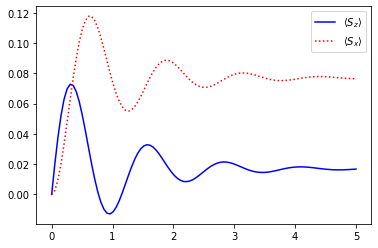

In [127]:
# CODE 1.3

Gmp = 1 # pumping rate
Gmc = 0.1 # collisional relaxation rate
f = 0.4 # fractional transfer rate
w = 5 # rotation rate about y
PS = array([[1,0],[0,1]]) # Schrod. space unit matrix
rPS = PS.ravel()
cPS = rPS[...,None]
Ap = array([[0,0,0,-2*f],[0,1,0,0],[0,0,1,0],[0,0,0,2*f]]) # pumping
Ac = array([[1,0,0,-1],[0,2,0,0],[0,0,2,0],[-1,0,0,1]])/2 # collisions
# spin ops in Schrodinger space
Sx = array([[0,1],[1,0]])/2
Sy = array([[0,1],[-1,0]])/(2*1j)
Sz = array([[1,0],[0,-1]])/2
# spin op column and row vectors
rSx = Sx.ravel()
rSy = Sy.ravel()
rSz = Sz.ravel()
cSx = rSx[...,None]
cSy = rSy[...,None]
cSz = rSz[...,None]
SyC = array([[0,1,1,0],[-1,0,0,1],[-1,0,0,1],[0,-1,-1,0]])/(2*1j) # spin superop
G = Gmp*Ap + Gmc*Ac + 1j*w*SyC # damping superop
nt = 100
t = linspace(0,5,nt)
rho = zeros((4,nt))
for k in range(nt):
    rho[:,k]=dot(expm(-G*t[k]),rPS/2) # initial condition is rho = rPS/2, i.e. a mixed state (1/2,0,0,1/2)
    
plt.plot(t,real(dot(rSz,rho)),'-b',label=r'$\langle S_z \rangle$')
plt.plot(t,real(dot(rSx,rho)),'r:',label=r'$\langle S_x \rangle$')
plt.legend()

done


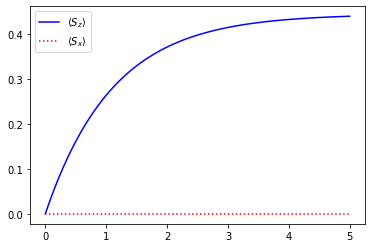

In [128]:
# CODE 1.6 and modified 1.3 solution

# compactification of the Louiville space into subspaces.
# when there is no transverse B field. in this case, 
# populations only couple to other populations, and likewise for coherences

L = rPS > 0 # logical variable to get populations

G = Gmp*Ap + Gmc*Ac # damping superop, no transverse B field
Gpop = G[L][:,L]
nt = 100
t = linspace(0,5,nt)
rho = zeros((4,nt))[L,:] # populations only 
for k in range(nt):
    rho[:,k]=dot(expm(-Gpop*t[k]),rPS[L]/2) # initial condition is rho = rPS/2, i.e. a mixed state (1/2,0,0,1/2)
plt.plot(t,real(dot(rSz[L],rho)),'-b',label=r'$\langle S_z \rangle$')
plt.plot(t,real(dot(rSx[L],rho)),'r:',label=r'$\langle S_x \rangle$')
plt.legend()

In [119]:
G,G[L][:,L]

(array([[ 0.05,  0.  ,  0.  , -0.85],
        [ 0.  ,  1.1 ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  1.1 ,  0.  ],
        [-0.05,  0.  ,  0.  ,  0.85]]),
 array([[ 0.05, -0.85],
        [-0.05,  0.85]]))

In [115]:
a = array([[1, 2, 3],
              [4, 5, 6]])
b = array([[True, False, False],
           [False, False, True]])
a[b]

array([1, 6])

In [101]:
rho[:,0][L]

array([ True, False, False,  True])

In [53]:
eyeR=eye.ravel()
eyeC=eyeR[...,None]
eyeC.shape,eyeR.shape

((4, 1), (4,))

In [57]:
dot(eyeR,eyeC)

array([2])